In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

In [3]:
dating = pd.read_csv('http://knuth.luther.edu/~mestca01/Speed_Dating_Data.csv')

In [4]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
dating.shape

(8378, 195)

In [28]:
print('Total number of people that participated, assuming person does not appear in more than one wave: {}'.format(len(dating['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(dating.index)))

Total number of people that participated, assuming person does not appear in more than one wave: 551
Total number of dates occurred: 8378


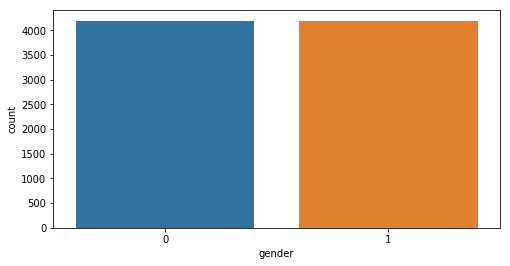

In [7]:
# Simple check to see if the number of men and women are equivalent
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=dating)

Text(0,0.5,'Frequency')

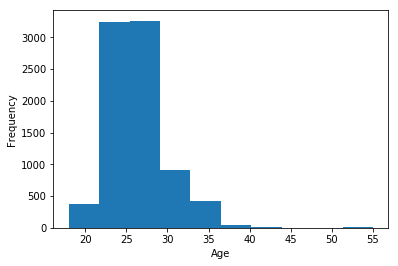

In [11]:
# age distribution of participants
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [12]:
# out of curiosity, I want to see how many speed daters found a match!
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [13]:
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

In [14]:
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5, dating_6,dating_7,dating_8], axis=1)

In [15]:
date.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
           ... 
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel       296
fun         350
like        240
prob        309
met         375
Length: 67, dtype: int64

In [16]:
date2 = date.dropna()
date2.head()

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
30,4,0,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,...,9.0,7.0,0,4.0,10.0,8.0,5.0,6.0,7.0,2.0
31,4,0,12.0,0,-0.18,1,22.0,2.0,60.0,0.0,...,9.0,7.0,0,8.0,7.0,8.0,10.0,8.0,1.0,1.0
33,4,0,14.0,1,-0.18,1,23.0,2.0,30.0,5.0,...,9.0,7.0,1,8.0,10.0,7.0,10.0,8.0,10.0,1.0
34,4,0,15.0,0,0.21,0,24.0,3.0,30.0,10.0,...,9.0,7.0,0,6.0,9.0,8.0,9.0,7.0,7.0,2.0
35,4,0,16.0,0,0.37,1,25.0,2.0,50.0,0.0,...,9.0,7.0,0,5.0,10.0,8.0,4.0,4.0,3.0,2.0


In [17]:
date3 = date2.drop(['field', 'from', 'career'], axis=1)

Text(0,0.5,'Average')

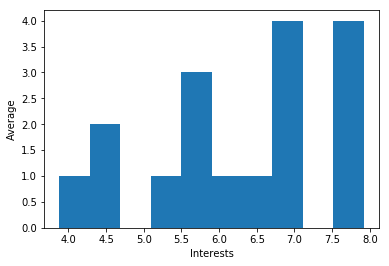

In [6]:
interests = dating.iloc[:, 50:67]

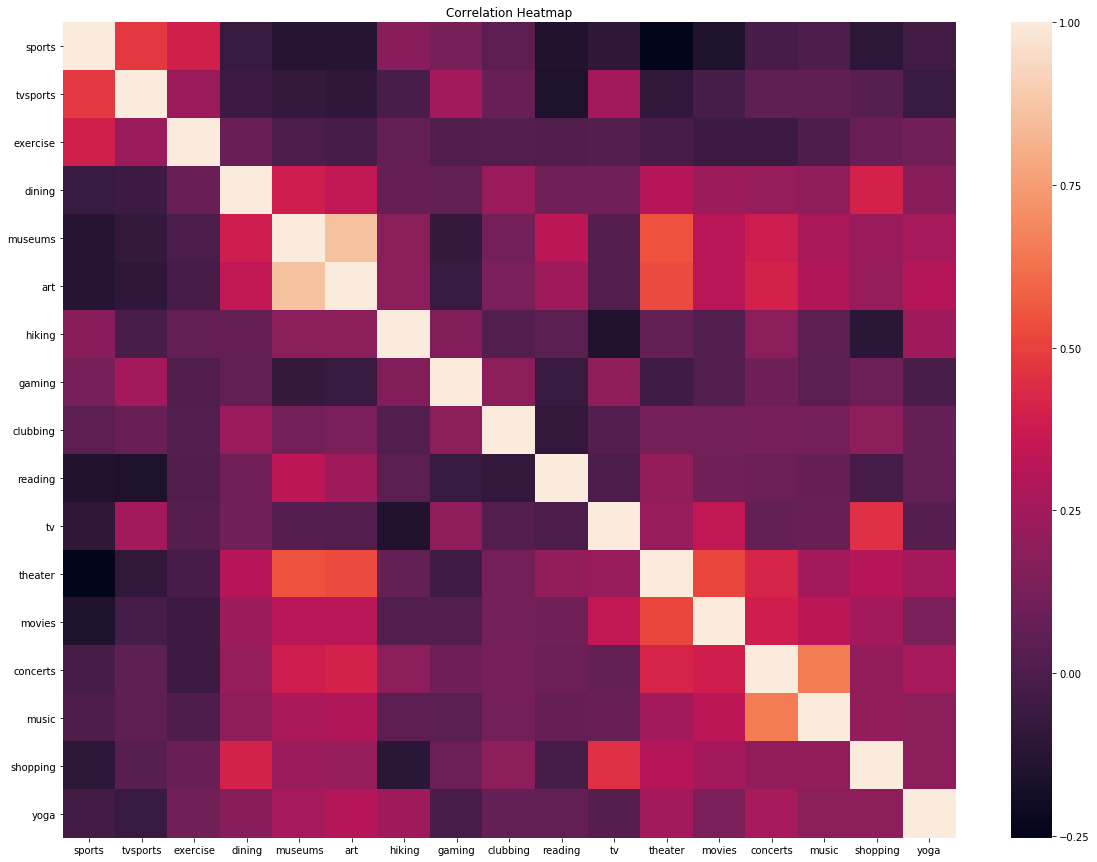

In [19]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = interests.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0,0.5,'Frequency')

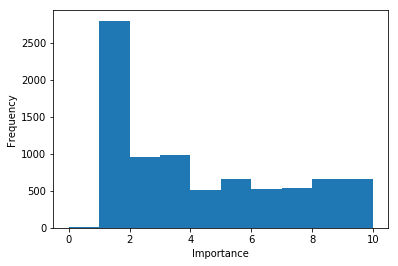

In [22]:
# distribution of how important that a person you date be of the same racial/ethnic background
imprace = dating[np.isfinite(dating['imprace'])]['imprace']
plt.hist(imprace.values)
plt.xlabel('Importance')
plt.ylabel('Frequency')

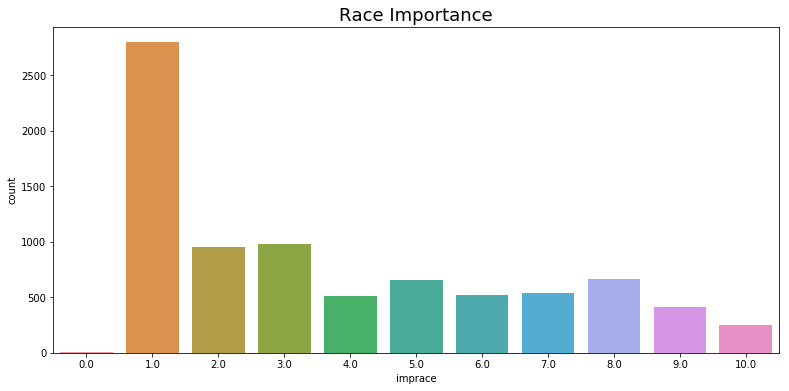

In [19]:
plt.figure(figsize=(13,6))
plt.title('Race Importance', fontsize=18)
plt.xlabel('Importance')
plt.ylabel('Frequency')
sns.countplot(dating['imprace'])

Text(0,0.5,'Frequency')

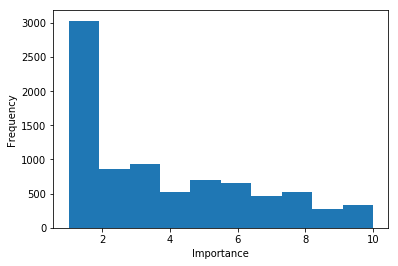

In [23]:
# distribution of how important that a person you date be of the same religious background
imprelig = dating[np.isfinite(dating['imprelig'])]['imprelig']
plt.hist(imprelig.values)
plt.xlabel('Importance')
plt.ylabel('Frequency')

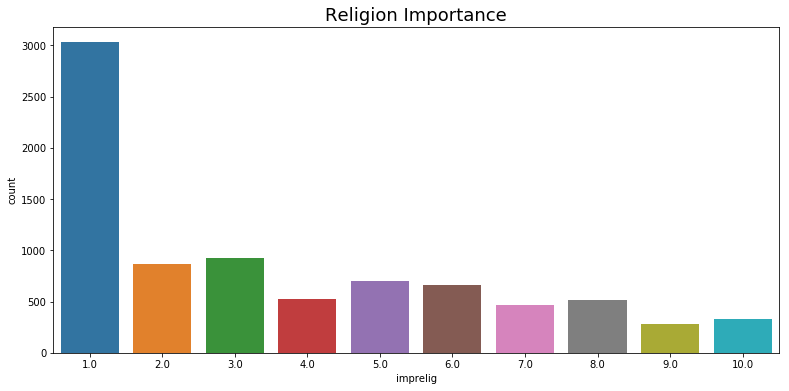

In [21]:
plt.figure(figsize=(13,6))
plt.title('Religion Importance', fontsize=18)
sns.countplot(dating['imprelig'])

Text(0,0.5,'Frequency')

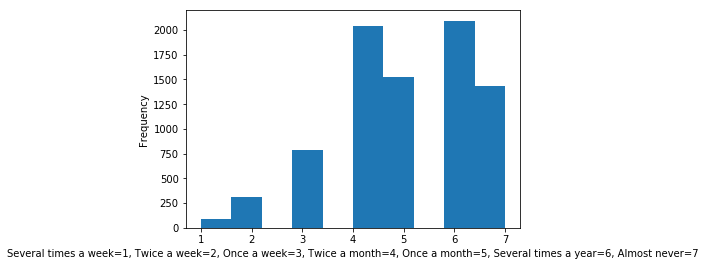

In [26]:
# distribution of how frequently the participant goes on dates
datefreq = dating[np.isfinite(dating['date'])]['date']
plt.hist(datefreq.values)
plt.xlabel('Several times a week=1, Twice a week=2, Once a week=3, Twice a month=4, Once a month=5, Several times a year=6, Almost never=7')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

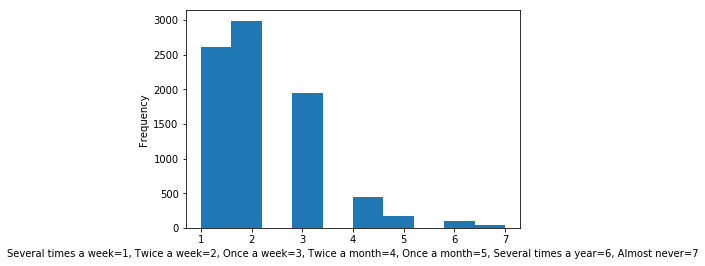

In [27]:
# distribution of how frequently the participant goes out (not necessarily on dates)
go_out = dating[np.isfinite(dating['go_out'])]['go_out']
plt.hist(go_out.values)
plt.xlabel('Several times a week=1, Twice a week=2, Once a week=3, Twice a month=4, Once a month=5, Several times a year=6, Almost never=7')
plt.ylabel('Frequency')

In [27]:
attributes_gender = dating[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligent','Fun','Ambition','Shared Interests']
attributes_gender.columns = cols

In [26]:
trace1 = go.Bar(
    y=list(attributes_gender.iloc[1]),
    x=attributes_gender.columns.values,
    name='Men',
    marker=dict(color='darkblue'))

trace2 = go.Bar(
    y=list(attributes_gender.iloc[0]),
    x=attributes_gender.columns.values,
    name='Women',
    marker=dict(color='pink'))

data = [trace1, trace2]

layout = go.Layout(title='What People Are Looking For in the Opposite Sex',font=dict(size=16),
    legend=dict(font=dict(size=16)))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')